# Image in spatial and frequency domain

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib.image as mpimg

In [31]:
# loading image
img = mpimg.imread('i/super_mario_head.png')

choosen_y_x = 90
resolution = 128

# 128 x 128 slice (power of 2)
img_slice = img[choosen_y_x:(choosen_y_x + resolution), choosen_y_x:(choosen_y_x + resolution), 2]

# DCT freq and Inversed DCT image

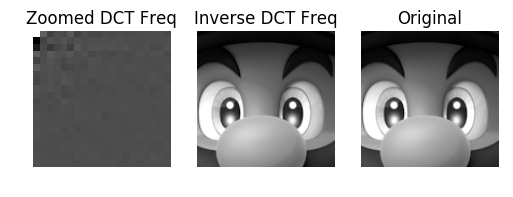

In [32]:
# transform: 2D DCT
dct_slice = fftpack.dct(fftpack.dct(img_slice.T, norm='ortho').T, norm='ortho')
# inverse transform: 2D DCT
idct_slice = fftpack.idct(fftpack.idct(dct_slice.T, norm='ortho').T, norm='ortho')

f, (plt1, plt2, plt3) = plt.subplots(1, 3)

plt1.axis('off'); plt1.set_title('Zoomed DCT Freq'); plt1.imshow(dct_slice[0:20,0:20], cmap='gray', interpolation='nearest');
plt2.axis('off'); plt2.set_title('Inverse DCT Freq'); plt2.imshow(idct_slice, cmap='gray');
plt3.axis('off'); plt3.set_title('Original'); plt3.imshow(img_slice, cmap='gray');

# Discarding 80% of the coefficients

80% of the coefficients were discarded.


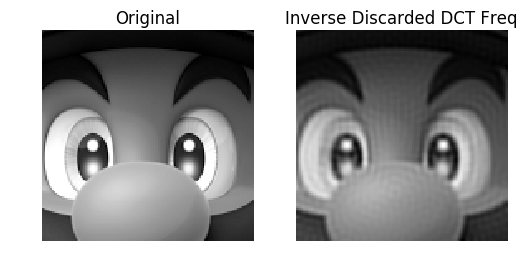

In [33]:
# copying dct
dct_slice_copy = np.copy(dct_slice)

# only below the top left triangle to retain the lowest frequency
triangle = (50/100) * resolution

# only discard greater than threshold
threshold = 0.0019

discarded_coefficients = 0

for x in range(resolution):
    for y in range(resolution):
        if ((x +  y) > triangle) and (abs(dct_slice_copy[x, y]) > threshold):
            dct_slice_copy[x, y] = 0
            discarded_coefficients += 1

# 2D inverse DCT            
idct_slice = fftpack.idct(fftpack.idct(dct_slice_copy.T, norm='ortho').T, norm='ortho')

f, (plt1, plt2) = plt.subplots(1, 2)

plt1.axis('off'); plt1.set_title('Original'); plt1.imshow(img_slice, cmap='gray', interpolation='nearest')
plt2.axis('off'); plt2.set_title('Inverse Discarded DCT Freq'); plt2.imshow(idct_slice, cmap='gray', interpolation='nearest')


print("%d%% of the coefficients were discarded." % ((discarded_coefficients / (resolution*resolution)) * 100))